In [1]:
import retro
import scipy.misc
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import cv2 as cv

from EightBitTemplateMatcher import EightBitTemplateMatcher

env = None

In [2]:
sonic_files = [ './data/Sonic_2/Sonic/Common/23.png', './data/Sonic_2/Badniks/Emerald_Hills/7.png' ]
sonics = [ scipy.misc.imread( sonic_file, mode='RGBA' ) for sonic_file in sonic_files ]

/Users/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [3]:
sonic_1_matcher = EightBitTemplateMatcher( [ sonics[ 0 ] ] )
sonic_2_matcher = EightBitTemplateMatcher( [ sonics[ 1 ] ] )

In [4]:
if env is None:
    env = retro.make(game='SonicTheHedgehog2-Genesis', state='EmeraldHillZone.Act1')
_ = env.reset()

In [5]:
i=0
frame_src = None
while( i < 145 ):
    frame_src = env.step([ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ])[0]
    i+=1

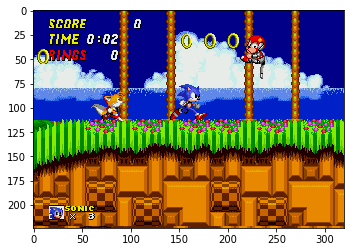

In [6]:
plt.imshow( frame_src )

In [7]:
match_1 = sonic_1_matcher.matchTemplate( frame_src )
match_2 = sonic_2_matcher.matchTemplate( frame_src )

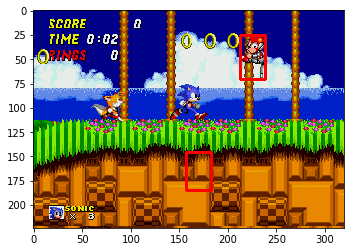

In [8]:
frame_copy = frame_src.copy()
cv.rectangle( frame_copy, match_1[ 1 ], match_1[ 2 ], 255, 2 )
cv.rectangle( frame_copy, match_2[ 1 ], match_2[ 2 ], 255, 2 )
plt.imshow( frame_copy )